📅 Contoh data setelah preprocessing:


,Jumlah_Pengunjung
Tanggal,
2025-07-25,73
2025-07-26,30
2025-07-27,30
2025-07-28,107
2025-07-29,30
2025-07-30,233
2025-07-31,144
2025-08-01,30
2025-08-02,30


Train data: 89 hari
Test data : 23 hari

⏳ Melatih model Holt-Winters...
✅ Model selesai dilatih!

📉 RMSE: 142.606
📈 MAPE: 146.16%


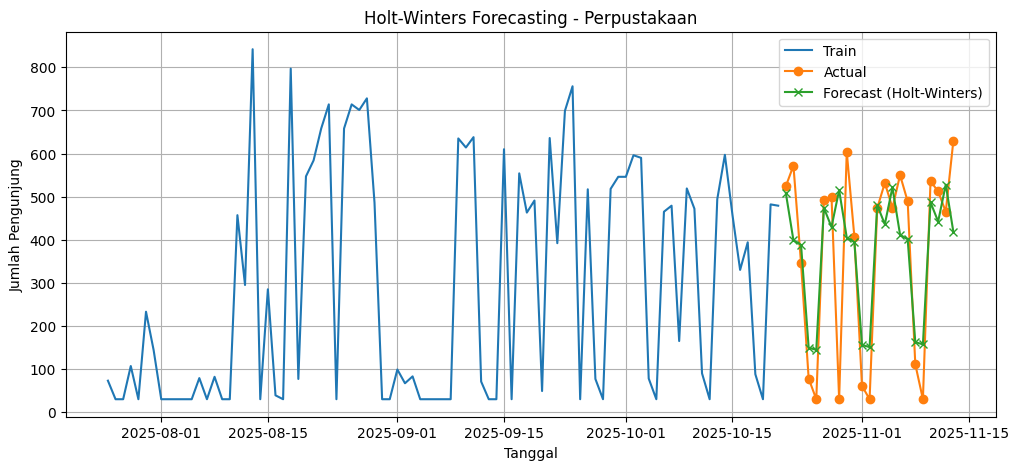


🔮 Forecast 6 Hari ke Depan:


,Forecast_Pengunjung
Tanggal,
2025-11-14,509
2025-11-15,399
2025-11-16,388
2025-11-17,150
2025-11-18,144
2025-11-19,474


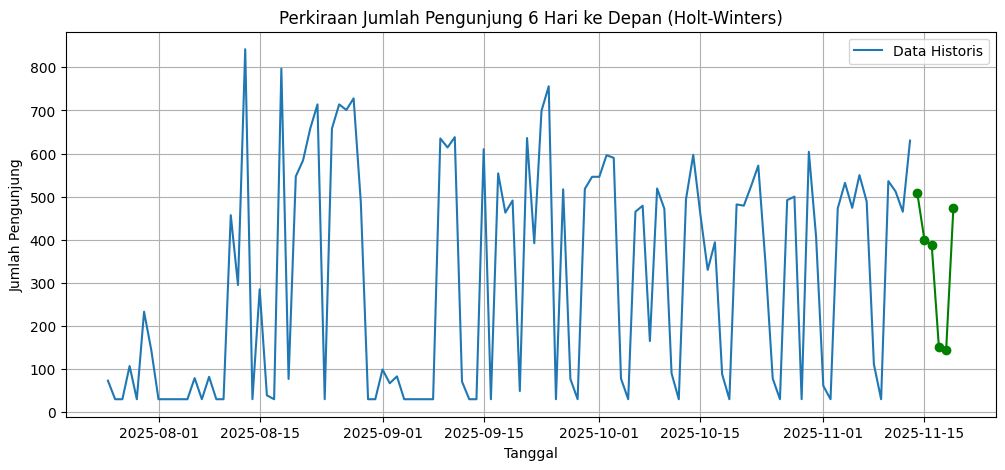


✅ Holt-Winters forecasting selesai!


In [16]:
# ================================================================
# 📘 Forecasting Perpustakaan - Holt Winters (Exponential Smoothing)
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------
# 1️⃣ LOAD DATA
# ------------------------------------------------
excel_filename = "dummy_pengunjung_perpustakaan.xlsx"

data = pd.read_excel(excel_filename, parse_dates=["Tanggal"])
data = data.sort_values("Tanggal")

# ------------------------------------------------
# 2️⃣ PREPROCESSING
# ------------------------------------------------
data.set_index("Tanggal", inplace=True)

# Resample menjadi harian
data_daily = data.resample("D").sum()

# 🔥 Ganti hari kosong (0 atau NaN) dengan 30
data_daily["Jumlah_Pengunjung"] = (
    data_daily["Jumlah_Pengunjung"]
    .replace(0, np.nan)   # jika ada 0 dianggap missing
    .fillna(30)           # isi dengan 30
)

data_daily["Jumlah_Pengunjung"] = data_daily["Jumlah_Pengunjung"].astype(int)

print("📅 Contoh data setelah preprocessing:")
display(data_daily.head(10))

# ------------------------------------------------
# 3️⃣ TRAIN - TEST SPLIT
# ------------------------------------------------
train_size = int(len(data_daily) * 0.8)
train = data_daily.iloc[:train_size]
test = data_daily.iloc[train_size:]

print(f"Train data: {len(train)} hari")
print(f"Test data : {len(test)} hari")

# ------------------------------------------------
# 4️⃣ FIT MODEL HOLT-WINTERS
# ------------------------------------------------
print("\n⏳ Melatih model Holt-Winters...")

model = ExponentialSmoothing(
    train["Jumlah_Pengunjung"],
    trend="add",
    seasonal="add",
    seasonal_periods=7
).fit()

print("✅ Model selesai dilatih!")

# ------------------------------------------------
# 5️⃣ FORECAST DATA TEST
# ------------------------------------------------
forecast = model.forecast(len(test))

# ------------------------------------------------
# 6️⃣ EVALUASI
# ------------------------------------------------
rmse = math.sqrt(mean_squared_error(test["Jumlah_Pengunjung"], forecast))

# ⚠️ MAPE aman karena tidak ada nilai aktual = 0 lagi
mape = np.mean(np.abs((test["Jumlah_Pengunjung"] - forecast) / test["Jumlah_Pengunjung"])) * 100

print(f"\n📉 RMSE: {rmse:.3f}")
print(f"📈 MAPE: {mape:.2f}%")

# ------------------------------------------------
# 7️⃣ PLOT
# ------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(train.index, train["Jumlah_Pengunjung"], label="Train")
plt.plot(test.index, test["Jumlah_Pengunjung"], label="Actual", marker="o")
plt.plot(test.index, forecast, label="Forecast (Holt-Winters)", marker="x")
plt.title("Holt-Winters Forecasting - Perpustakaan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------
# 8️⃣ FORECAST 6 HARI KE DEPAN
# ------------------------------------------------
future_values = model.forecast(6)
future_dates = pd.date_range(start=data_daily.index[-1] + pd.Timedelta(days=1), periods=6)

forecast_table = pd.DataFrame({
    "Tanggal": future_dates,
    "Forecast_Pengunjung": np.round(future_values).astype(int)
}).set_index("Tanggal")

print("\n🔮 Forecast 6 Hari ke Depan:")
display(forecast_table)

plt.figure(figsize=(12,5))
plt.plot(data_daily.index, data_daily["Jumlah_Pengunjung"], label="Data Historis")
plt.plot(forecast_table.index, forecast_table["Forecast_Pengunjung"], marker="o", color="green")
plt.title("Perkiraan Jumlah Pengunjung 6 Hari ke Depan (Holt-Winters)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pengunjung")
plt.grid(True)
plt.legend()
plt.show()

print("\n✅ Holt-Winters forecasting selesai!")
